EE838
PA1 Problem1
Jedsadakorn Yonchorhor 20194695


In [38]:
''' import the libs '''
import numpy as np
import cv2
import copy
import math
from matplotlib import pyplot as plt

In [39]:
''' read the image '''
img = cv2.imread("monument.jpg")
h, w = img.shape[:2]

In [40]:
''' Use mouse to select the points for making the line 
    - Select two parallel pairs of lines
    - Each pairs will occupy 4 points
'''

NUM_POINTS = 8 # need 20 points to create five pair of lines

# the [x, y, 1] for each double left-click event will be stored here
points = list()

#this function will be called whenever the mouse is left-clicked
def mouse_callback(event, x, y, flags, params):
    # ref: https://stackoverflow.com/questions/32770654/get-pixel-location-using-mouse-click-events
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global points, NUM_POINTS

        #store the coordinates of the right-click event
        points.append([float(x), float(y), 1.])
        print(f"Get {len(points)} / {NUM_POINTS}", points)


cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.resizeWindow('image', int(w), int(h))

#set mouse callback function for window
cv2.setMouseCallback('image', mouse_callback)

cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

assert(len(points) == NUM_POINTS), "Need eights points"

points = np.array(points)

Get 1 / 8 [[250.0, 48.0, 1.0]]
Get 2 / 8 [[250.0, 48.0, 1.0], [242.0, 419.0, 1.0]]
Get 3 / 8 [[250.0, 48.0, 1.0], [242.0, 419.0, 1.0], [276.0, 57.0, 1.0]]
Get 4 / 8 [[250.0, 48.0, 1.0], [242.0, 419.0, 1.0], [276.0, 57.0, 1.0], [288.0, 421.0, 1.0]]
Get 5 / 8 [[250.0, 48.0, 1.0], [242.0, 419.0, 1.0], [276.0, 57.0, 1.0], [288.0, 421.0, 1.0], [5.0, 403.0, 1.0]]
Get 6 / 8 [[250.0, 48.0, 1.0], [242.0, 419.0, 1.0], [276.0, 57.0, 1.0], [288.0, 421.0, 1.0], [5.0, 403.0, 1.0], [600.0, 443.0, 1.0]]
Get 7 / 8 [[250.0, 48.0, 1.0], [242.0, 419.0, 1.0], [276.0, 57.0, 1.0], [288.0, 421.0, 1.0], [5.0, 403.0, 1.0], [600.0, 443.0, 1.0], [77.0, 471.0, 1.0]]
Get 8 / 8 [[250.0, 48.0, 1.0], [242.0, 419.0, 1.0], [276.0, 57.0, 1.0], [288.0, 421.0, 1.0], [5.0, 403.0, 1.0], [600.0, 443.0, 1.0], [77.0, 471.0, 1.0], [343.0, 478.0, 1.0]]


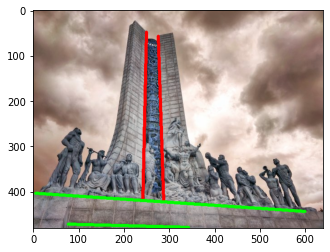

True

In [41]:
''' visualize the selected lines in pairs (same color) '''
plot_points = [(int(points[i, 0]), int(points[i, 1])) for i in range(NUM_POINTS)]
img_plot = copy.deepcopy(img)

# form the lines from two points using cross products
l = list()
m = list()

l.append(np.cross(points[0], points[1]))
l.append(np.cross(points[2], points[3]))

m.append(np.cross(points[4], points[5]))
m.append(np.cross(points[6], points[7]))


# draw lines
img_plot = cv2.line(img_plot, plot_points[0], plot_points[1],(255,0,0),5)
img_plot = cv2.line(img_plot, plot_points[2], plot_points[3],(255,0,0),5)

img_plot = cv2.line(img_plot, plot_points[4], plot_points[5],(0,255,0),5)
img_plot = cv2.line(img_plot, plot_points[6], plot_points[7],(0,255,0),5)
    

plt.imshow(img_plot), plt.show()
cv2.imwrite("01_original_img.jpg", img)
cv2.imwrite("02_original_img_with_lines.jpg", img_plot)

In [42]:
''' find the vanishing line l '''
p1 = np.cross(l[0], l[1])
p2 = np.cross(m[0], m[1])
p1 = p1 / p1[2]
p2 = p2 / p2[2]

l  = np.cross(p1, p2)   # vanishing line
l = l / l[-1]

print(p1, p2)
print(l)

[ 260.16404128 -423.35741445    1.        ] [1.62082703e+03 5.11627027e+02 1.00000000e+00]
[-0.0011412   0.00166077  1.        ]


In [43]:
''' form H1 matrix from the vanishing line l '''
H1 = np.matrix([[1, 0, 0], 
                [0, 1, 0], 
                [l[0] , l[1], l[2]]])
print(H1)
print(np.transpose(np.linalg.inv(H1)) * l.reshape(3, 1))    # check if it transform the vanishing line to ideal line

[[ 1.          0.          0.        ]
 [ 0.          1.          0.        ]
 [-0.0011412   0.00166077  1.        ]]
[[0.]
 [0.]
 [1.]]


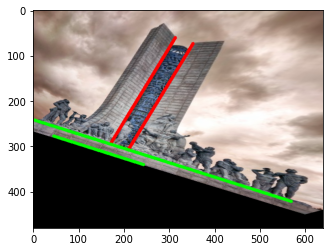

True

In [44]:
''' Visualize the perspective rectrified image '''
img_persp_rect = cv2.warpPerspective(img, H1, (w, h))
points_persp_rect = H1 @ points.T
points_persp_rect = points_persp_rect / points_persp_rect[-1]
points_persp_rect = points_persp_rect.T

plot_points_persp_rect = [(int(points_persp_rect[i, 0]), int(points_persp_rect[i, 1])) for i in range(NUM_POINTS)]

img_persp_rect_plot = copy.deepcopy(img_persp_rect)

img_persp_rect_plot = cv2.line(img_persp_rect_plot, plot_points_persp_rect[0], plot_points_persp_rect[1],(255,0,0),5)
img_persp_rect_plot = cv2.line(img_persp_rect_plot, plot_points_persp_rect[2], plot_points_persp_rect[3],(255,0,0),5)

img_persp_rect_plot = cv2.line(img_persp_rect_plot, plot_points_persp_rect[4], plot_points_persp_rect[5],(0,255,0),5)
img_persp_rect_plot = cv2.line(img_persp_rect_plot, plot_points_persp_rect[6], plot_points_persp_rect[7],(0,255,0),5)

plt.imshow(img_persp_rect_plot), plt.show()
cv2.imwrite("03_img_persp_rect.jpg", img_persp_rect)
cv2.imwrite("04_img_persp_rect_with_lines.jpg", img_persp_rect_plot)

In [48]:
''' Use mouse to select the points for making the line
    - Select two perpendicular pairs of lines
    - Each pairs will occupy 4 points
'''

NUM_POINTS = 8
#the [x, y] for each right-click event will be stored here
points = list()

cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.resizeWindow('image', int(w), int(h))

#set mouse callback function for window
cv2.setMouseCallback('image', mouse_callback)

cv2.imshow('image', img_persp_rect)
cv2.waitKey(0)
cv2.destroyAllWindows()

assert(len(points) == NUM_POINTS), "Need six points"

points = np.array(points)

Get 1 / 8 [[317.0, 59.0, 1.0]]
Get 2 / 8 [[317.0, 59.0, 1.0], [172.0, 293.0, 1.0]]
Get 3 / 8 [[317.0, 59.0, 1.0], [172.0, 293.0, 1.0], [171.0, 295.0, 1.0]]
Get 4 / 8 [[317.0, 59.0, 1.0], [172.0, 293.0, 1.0], [171.0, 295.0, 1.0], [357.0, 353.0, 1.0]]
Get 5 / 8 [[317.0, 59.0, 1.0], [172.0, 293.0, 1.0], [171.0, 295.0, 1.0], [357.0, 353.0, 1.0], [85.0, 280.0, 1.0]]
Get 6 / 8 [[317.0, 59.0, 1.0], [172.0, 293.0, 1.0], [171.0, 295.0, 1.0], [357.0, 353.0, 1.0], [85.0, 280.0, 1.0], [319.0, 352.0, 1.0]]
Get 7 / 8 [[317.0, 59.0, 1.0], [172.0, 293.0, 1.0], [171.0, 295.0, 1.0], [357.0, 353.0, 1.0], [85.0, 280.0, 1.0], [319.0, 352.0, 1.0], [223.0, 312.0, 1.0]]
Get 8 / 8 [[317.0, 59.0, 1.0], [172.0, 293.0, 1.0], [171.0, 295.0, 1.0], [357.0, 353.0, 1.0], [85.0, 280.0, 1.0], [319.0, 352.0, 1.0], [223.0, 312.0, 1.0], [212.0, 331.0, 1.0]]


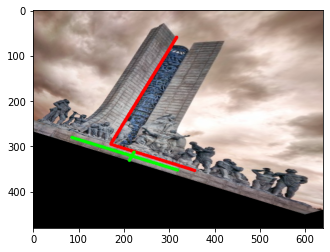

True

In [49]:
''' Visualize the selected line '''
plot_points = [(int(points[i, 0]), int(points[i, 1])) for i in range(NUM_POINTS)]
img_persp_rect_plot = copy.deepcopy(img_persp_rect)

img_persp_rect_plot = cv2.line(img_persp_rect_plot, plot_points[0], plot_points[1],(255,0,0),5)
img_persp_rect_plot = cv2.line(img_persp_rect_plot, plot_points[2], plot_points[3],(255,0,0),5)

img_persp_rect_plot = cv2.line(img_persp_rect_plot, plot_points[4], plot_points[5],(0,255,0),5)
img_persp_rect_plot = cv2.line(img_persp_rect_plot, plot_points[6], plot_points[7],(0,255,0),5)

plt.imshow(img_persp_rect_plot), plt.show()
cv2.imwrite("05_img_persp_rect_with_perpen_lines.jpg", img_persp_rect_plot)

In [50]:
''' form the lines '''
l1 = np.cross(points[0], points[1])
m1 = np.cross(points[2], points[3])

l2 = np.cross(points[4], points[5])
m2 = np.cross(points[6], points[7])

In [51]:
''' Solving the equations for H2 matrix'''
M = np.matrix([[l1[0]*m1[0], l1[0]*m1[1] + l1[1]*m1[0]], 
               [l2[0]*m2[0], l2[0]*m2[1] + l2[1]*m2[0]]])

b = np.matrix([[-l1[1]*m1[1]],
               [-l2[1]*m2[1]]])

# solve the equations
s1, s2 = np.linalg.inv(M) @ b
s1 = s1[0, 0]
s2 = s2[0, 0]
S = np.matrix([[s1, s2],
               [s2,  1]])

# get A matrix from SVD decomposition of S = A.T @ A
u, s, vh = np.linalg.svd(S)
smat = np.diag(np.sqrt(s))
A = u @ smat @ vh

# get H2 matrix
H2 = np.zeros((3, 3))
H2[:2, :2] = A
H2[-1, -1] = 1

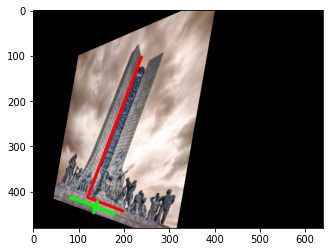

True

In [54]:
''' Visualize the rectrification result '''
# to translate the image back into the frame
tx = 100
ty = 100
M = np.float32([[1, 0, tx], [0, 1, ty], [0, 0, 1]])

img_affine_rect = cv2.warpPerspective(img_persp_rect, M.dot(np.linalg.inv(H2)), (w, h))

points_affine_rect = M.dot(np.linalg.inv(H2)) @ points.T
points_affine_rect = points_affine_rect / points_affine_rect[-1]
points_affine_rect = points_affine_rect.T

plot_points_affine_rect = [(int(points_affine_rect[i, 0]), int(points_affine_rect[i, 1])) for i in range(NUM_POINTS)]

img_affine_rect_plot = copy.deepcopy(img_affine_rect)
img_affine_rect_plot = cv2.line(img_affine_rect_plot, plot_points_affine_rect[0], plot_points_affine_rect[1],(255,0,0),5)
img_affine_rect_plot = cv2.line(img_affine_rect_plot, plot_points_affine_rect[2], plot_points_affine_rect[3],(255,0,0),5)
img_affine_rect_plot = cv2.line(img_affine_rect_plot, plot_points_affine_rect[4], plot_points_affine_rect[5],(0,255,0),5)
img_affine_rect_plot = cv2.line(img_affine_rect_plot, plot_points_affine_rect[6], plot_points_affine_rect[7],(0,255,0),5)

plt.imshow(img_affine_rect_plot), plt.show()
cv2.imwrite("06_img_affine_rect_plot.jpg", img_affine_rect_plot)
cv2.imwrite("07_img_affine_rect.jpg", img_affine_rect)